# Hierarchical Cluster Analysis Notebook

### Importing Data files

In [1]:
import pandas as pd
#Import Product DataSet here
product_data = pd.read_csv('Data/ProductDataSet.csv',sep='|')
product_data.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [2]:
#Import Transaction DataSet here
transactions_data = pd.read_csv('Data/TransactionDataSet.csv',sep='|')
transactions_data.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


In [3]:
#Import Customer Dataset Here
customer_data=pd.read_csv('Data/CustomerDataSet.csv')
customer_data.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


### Changing data types

In [4]:
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : x.replace('$',''))

In [5]:
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : int(x.replace(',','')))

### Creating Customer View

In [6]:
trans_products=transactions_data.merge(product_data,how='inner', left_on='PRODUCT NUM', right_on='PRODUCT CODE')

In [7]:
trans_products['UNIT LIST PRICE']=trans_products['UNIT LIST PRICE'].map(lambda x : float(x.replace('$','')))

In [8]:
trans_products['Total_Price']=trans_products['QUANTITY PURCHASED'] * trans_products['UNIT LIST PRICE'] * (1- trans_products['DISCOUNT TAKEN'])

In [9]:
customer_prod_categ=trans_products.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'Total_Price':'sum'})

In [10]:
customer_prod_categ=customer_prod_categ.reset_index()

In [11]:
customer_pivot=customer_prod_categ.pivot(index='CUSTOMER NUM',columns='PRODUCT CATEGORY',values='Total_Price')

In [12]:
trans_total_spend=trans_products.groupby('CUSTOMER NUM').agg({'Total_Price':'sum'}).\
rename(columns={'Total_Price':'TOTAL SPENT'})

In [13]:
customer_KPIs=customer_pivot.merge(trans_total_spend,how='inner',left_index=True, right_index=True )

In [14]:
customer_KPIs=customer_KPIs.fillna(0)


In [15]:
customer_all_view=customer_data.merge(customer_KPIs,how='inner', left_on='CUSTOMERID', right_index=True)

In [16]:
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770
1,10002,0,42,94475,9,notenrolled,NaN,6,Married,2312.509,2473.163,276.779,0.000,5062.451
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694
4,10005,0,30,51498,3,notenrolled,NaN,1,Single,213.512,0.000,0.000,0.000,213.512


# Clustering  

# Hierarchical-Clustering

In [17]:
#Begin Writing your code here
#Import Clustering libraries
from sklearn.cluster import AgglomerativeClustering

#### The “cluster_input” variable is a Pandas data frame that contains only the columns “income” and “total spent”. We use these two continuous variables because of the following reasons:

#### 1-Two variables can be easily visualized on a 2-dimensional plot
#### 2-Clustering algorithms rely on a distance function (like Euclidean distance) to compute similarity among data points. The sample space for categorical data is discrete and doesn't have a natural origin, so a Euclidean distance function on such a space isn't really meaningful.

In [18]:
# we cluster “income” and “Total spent” variables 
cluster_input=customer_all_view[['INCOME','TOTAL SPENT']]
cluster_input.head(5)

,INCOME,TOTAL SPENT
0,133498,6826.770
1,94475,5062.451
2,88610,8562.440
3,84313,5522.694
4,51498,213.512


In [19]:
#Initialize a K-means model with four clusters as follows:
aggo_model=AgglomerativeClustering(n_clusters=4)
aggo_model

AgglomerativeClustering(n_clusters=4)

In [20]:
#Run the Hierarchical-Clustering cluster algorithm on the input by using “fit_predict” method:
cluster_output = aggo_model.fit_predict(cluster_input)
cluster_output


array([0, 3, 3, 3, 1, 0, 1, 0, 3, 1, 2, 3, 3, 3, 1, 3, 3, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 3, 2, 2, 1, 0, 0, 1, 2, 1, 1, 1,
       0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 3, 2, 0, 0, 0, 2, 3, 0, 0, 0, 0, 1,
       3, 0, 2, 1, 1, 2, 1, 1, 0, 2, 3, 2, 1, 0, 1, 0, 0, 0, 1, 3, 0, 1,
       3, 2, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 2, 2, 1, 2, 1, 3, 0, 2, 1, 1,
       2, 2, 1, 2, 3, 1, 0, 0, 1, 1, 2, 3, 0, 2, 3, 1, 0, 1, 2, 0, 1, 3,
       1, 3, 0, 3, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 3, 2, 3, 1, 3, 0, 0, 0,
       3, 3, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1,
       0, 0, 3, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 0,
       0, 3, 3, 2, 0, 0, 3, 2, 3, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 3, 1, 1,
       1, 2, 0, 1, 1, 1, 0, 2, 2, 3, 3, 1, 0, 3, 3, 2, 0, 0, 1, 1, 2, 1,
       3, 3, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 0, 3, 2, 0, 1, 3,
       3, 0, 3, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 3, 3, 1, 3, 0, 1,
       0, 3, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 3, 2,

In [21]:
#The numbers in the output array represent the cluster index for each sample. Indexes are in the range of [0,1,2,3] 
#because you specified four clusters. Samples with the same index belong to the same cluster.
type(cluster_output)

numpy.ndarray

In [22]:
#Values in the output are presented in a 1-dimensional array because we called only a single column of data.
#We can convert the 1-dimensional NumPy array to a Pandas data frame by using the following code:
cluster_output_pd=pd.DataFrame(cluster_output,columns=['segment'])

In [23]:
#The “cluster_output” is a 1-dimensional array because a single cluster index is assigned to every customer record.
cluster_output_pd.head()

,segment
0,0
1,3
2,3
3,3
4,1


In [24]:
#Merge the cluster input containing the income and total spending for each customer and the cluster output, 
#which contains the cluster index, by using the following code:
segment_DF=pd.concat([cluster_input,cluster_output_pd],axis=1)
segment_DF.head()


,INCOME,TOTAL SPENT,segment
0,133498,6826.770,0
1,94475,5062.451,3
2,88610,8562.440,3
3,84313,5522.694,3
4,51498,213.512,1


In [25]:
segment_DF[segment_DF['segment']==0]
#or using this #segment_DF[segment_DF.segment==0]

,INCOME,TOTAL SPENT,segment
0,133498,6826.770,0
5,132893,5234.847,0
7,115672,8412.001,0
17,112035,4242.889,0
18,137128,8021.160,0
...,...,...,...
488,110916,4657.108,0
489,139940,5863.644,0
492,142552,15017.240,0
495,113125,8501.464,0


In [26]:
import matplotlib.pyplot as plt

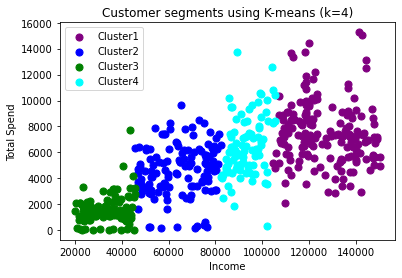

In [27]:
# s for color size , c for color , label for legend name , marker for the shape type, alpha for the shape lightness or transparent
plt.scatter(segment_DF[segment_DF.segment==0]['INCOME'],segment_DF[segment_DF.segment==0]['TOTAL SPENT'],s=50, c='purple',label='Cluster1')

plt.scatter(segment_DF[segment_DF.segment==1]['INCOME'],segment_DF[segment_DF.segment==1]['TOTAL SPENT'],s=50, c='blue',label='Cluster2')

plt.scatter(segment_DF[segment_DF.segment==2]['INCOME'],segment_DF[segment_DF.segment==2]['TOTAL SPENT'],s=50, c='green',label='Cluster3')

plt.scatter(segment_DF[segment_DF.segment==3]['INCOME'],segment_DF[segment_DF.segment==3]['TOTAL SPENT'],s=50, c='cyan',label='Cluster4')

plt.title('Customer segments using K-means (k=4)')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.legend()
plt.show()


In [28]:
customer_demographics=pd.concat([customer_all_view,cluster_output_pd],axis=1)
customer_demographics.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT,segment
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770,0
1,10002,0,42,94475,9,notenrolled,NaN,6,Married,2312.509,2473.163,276.779,0.000,5062.451,3
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440,3
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694,3
4,10005,0,30,51498,3,notenrolled,NaN,1,Single,213.512,0.000,0.000,0.000,213.512,1


#### Retailer X must know all about the different customer segments demographics. So, you must discover the characteristics that are associated with each segment, such as the age group, household size, and loyalty enrolment. To do this task, group by each customer segment and calculate group measures such as average age, percentage of loyalty enrolment, and median of house hold size.

In [29]:
customer_demographics.groupby('segment').agg({'AGE':'mean','HOUSEHOLD SIZE':'median'})


,AGE,HOUSEHOLD SIZE
segment,,
0,61.382022,3
1,32.430769,3
2,22.620000,2
3,40.804348,4


In [30]:
def percent_loyalty(series):
    percent=100 * series.value_counts()['enrolled'] /series.count()
    return percent

In [31]:
customer_demographics.groupby('segment').agg({'AGE':'mean','HOUSEHOLD SIZE':'median','LOYALTY GROUP': percent_loyalty})

,AGE,HOUSEHOLD SIZE,LOYALTY GROUP
segment,,,
0,61.382022,3,70.224719
1,32.430769,3,33.846154
2,22.620000,2,58.000000
3,40.804348,4,40.217391
